In [2]:
#Instalacion de Tensorflow 2.0
#!pip install tensorflow==2.0.0-rc0
!pip install opencv-python

In [1]:
#Importacion de librerias
from __future__ import absolute_import, division, print_function, unicode_literals
import os

#Datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#Tensorflow 2.0 y Keras
import tensorflow as tf
from tensorflow import keras

#Para cargar imagenes desde internet, se usan las siguientes librerias
from PIL import Image
import requests
from io import BytesIO

#Para reescalar la imagen
import cv2

In [2]:
#Verificar version de TF
print(tf.__version__)

2.0.0-rc0


## Importando el dataset
Se usaran 60,000 imagenes para entrenar a la red y 10,000 imagenes para evaluar con que presicion aprendio la red para clasificar las imagenes. Podemos acceder al Fahion MNIST directamente desde TensorFlow.

In [3]:
#Importamos y cargamos los datos de Fashion MNIST directamente desde TF
fashionMNIST = keras.datasets.fashion_mnist
#Cargar y dividir las imagenes en "entrenamiento" y "testeo"
(trainImages, trainLabels), (testImages, testLabels) = fashionMNIST.load_data()

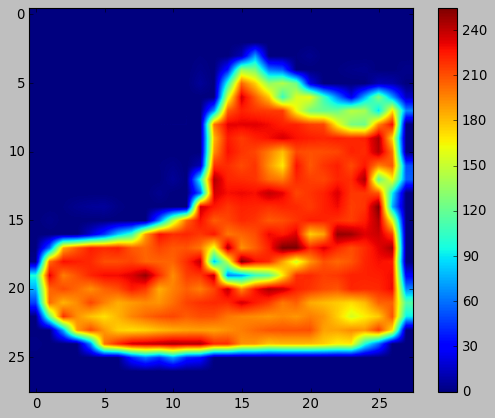

In [4]:
#dibujar una imagen
plt.style.use("classic")
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros que van de 0 a 9, y corresponen a la clase de vestimenta que representa la imagen:

In [5]:
classNames = ['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo',
             'Sandalia', 'Camisa', 'Tenis Deportivos', 'Bolso', 'Botines']

<br><br>
## Explorando datos

In [7]:
trainImages[0].shape

(28, 28)

In [8]:
testImages.shape

(10000, 28, 28)

In [9]:
trainLabels.shape

(60000,)

In [10]:
testLabels.shape

(10000,)

In [11]:
testLabels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
testImages[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Pre-Procesamiento de datos

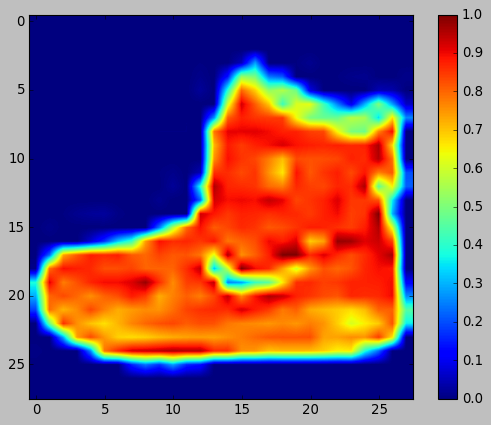

In [6]:
#Cambiando escala
trainImages = trainImages / 255
testImages = testImages / 255

plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(False)
plt.show()

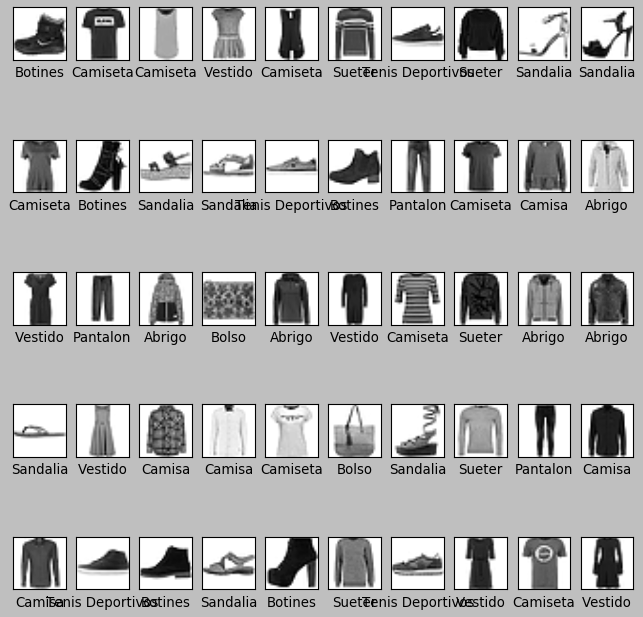

In [7]:
plt.figure(figsize=(10, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

## Configurando red neuronal
<style type="text/css">
  body {
    background-color: white }
 </style>
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [8]:
#Creacion del modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [9]:
#optimizer = como dara el salto 
#adam = mejora de gradiente descendiente estocastico 
#loss = como se medira el error
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Notas Importantes
### En clasificación
#### Target con codificación one hot tensorflow -> categorical_crossentropy
img1->    0   |  0   |   0   |   0   |   0   |   0   |  1   |   0   |  0   |   0 <br>
img2->    0   |  0   |   1   |   0   |   0   |   0   |  0   |   0   |  0   |   0 <br>

<img src="https://i.imgur.com/mtimFxh.png">
<br>

#### Target con enteros para representar categoría -> sparse_categorical_crossentropy
img1-> 2<br>
img2-> 6<br>
<br>
### En regresiónes 
#### loss = 'mse'
<br><br>
### Optimizadores
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Comparación de Adam con otros algoritmos de optimización que entrenan a un perceptrón multicapa" >

## Entrenando el modelo

In [67]:
#epochs: cuando el modelo procesa toda la informacion del dataset y ajusto los pesos
#Entrenando con datos de entrenamiento
checkPointPath = "checkpoints/check";
log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
cpCallbacks = tf.keras.callbacks.ModelCheckpoint(checkPointPath, save_weights_only=True, verbose=1)
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(trainImages, 
          trainLabels, 
          epochs=50, 
          validation_data=(testImages, testLabels),
          callbacks=[cpCallbacks, tensorboardCallback])
#luego ejecutar en terminal: tensorboard --logdir logs/fit

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59680/60000 [============================>.] - ETA: 0s - loss: 0.3262 - accuracy: 0.8822
Epoch 00001: saving model to checkpoints/check
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3264 - accuracy: 0.8821 - val_loss: 0.4030 - val_accuracy: 0.8583
Epoch 2/50
58432/60000 [============================>.] - ETA: 0s - loss: 0.3246 - accuracy: 0.8825
Epoch 00002: saving model to checkpoints/check
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3251 - accuracy: 0.8823 - val_loss: 0.4239 - val_accuracy: 0.8487
Epoch 3/50
58464/60000 [============================>.] - ETA: 0s - loss: 0.3218 - accuracy: 0.8831
Epoch 00003: saving model to checkpoints/check
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3227 - accuracy: 0.8829 - val_loss: 0.4021 - val_accuracy: 0.8574
Epoch 4/50
58848/60000 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.

Epoch 30/50
58976/60000 [============================>.] - ETA: 0s - loss: 0.2928 - accuracy: 0.8918
Epoch 00030: saving model to checkpoints/check
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2934 - accuracy: 0.8918 - val_loss: 0.4585 - val_accuracy: 0.8462
Epoch 31/50
59168/60000 [============================>.] - ETA: 0s - loss: 0.2928 - accuracy: 0.8924
Epoch 00031: saving model to checkpoints/check
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2927 - accuracy: 0.8925 - val_loss: 0.4161 - val_accuracy: 0.8583
Epoch 32/50
58944/60000 [============================>.] - ETA: 0s - loss: 0.2928 - accuracy: 0.8937
Epoch 00032: saving model to checkpoints/check
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2931 - accuracy: 0.8936 - val_loss: 0.4274 - val_accuracy: 0.8542
Epoch 33/50
59264/60000 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8934
Epoch 00033: saving model to checkpoints/

In [68]:
!tensorboard --logdir logs/fit

"tensorboard" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [42]:
#Entrenando con datos de testeo
testLoss, testAcc = model.evaluate(testImages, testLabels)
print("Precision del modelo:", testAcc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Precision del modelo: 0.856


## Predicciones

In [43]:
predictions = model.predict(testImages)

In [44]:
predictions[0]

array([4.2971909e-10, 1.7331483e-10, 1.5279489e-11, 9.1688619e-08,
       1.4998413e-09, 2.3114022e-02, 5.4476500e-06, 3.6956951e-02,
       3.9322354e-04, 9.3953025e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])

9

#### Prediccion con una imagen externa y ajena al dataset
**IMPORTANTE:**
La imagen a comprobar debe ser ingresada luego de recibir el mismo procesamiento que recibieron las imagenes de entrenamiento

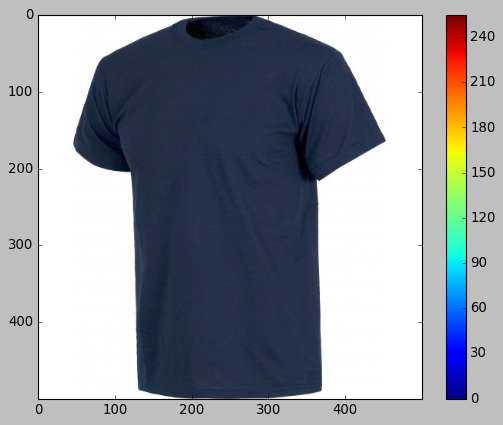

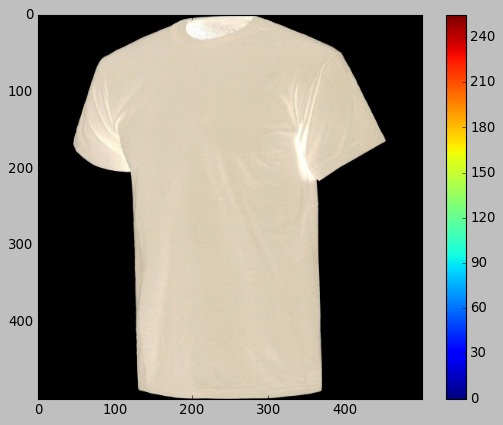

In [46]:
#Importar la imagen a partir de una URL
response = requests.get("https://www.turopalaboral.com/2893-home_default/camiseta-s6600-manga-corta-pack-3-unidades-workteam.jpg")
img = Image.open(BytesIO(response.content))

npImg = np.array(img)

#Mostramos la imagen
plt.figure()
plt.imshow(npImg)
plt.colorbar()
plt.grid(False)
plt.show()

#Invertimos colores de la imagen, para que se parezca a las del dataset
npImg = 255 - npImg

plt.figure()
plt.imshow(npImg)
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
npImg.shape

(500, 500, 3)

In [48]:
"""
En la forma de la imagen se puede observar que tiene 3 dimensiones, por ttanto, es a color.
La siguiente funcion convierte la imagen de estar a color a escala de grises
"""
def rgbToGray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

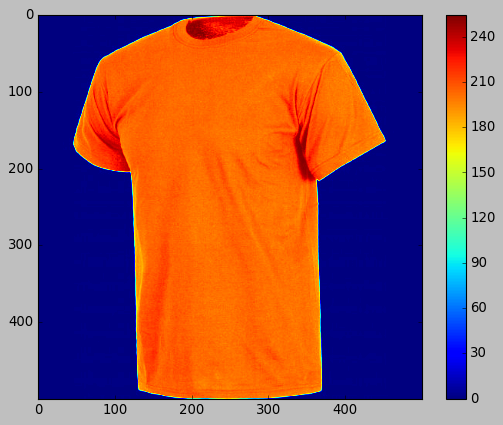

In [49]:
#Pasando la imagen a escala de grises
bnwImage = rgbToGray(npImg)

plt.figure()
plt.imshow(bnwImage)
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
bnwImage.shape

(500, 500)

In [51]:
#Ahora solo queda redimensionar la imagen a 28x28 como en el dataset
res = cv2.resize(bnwImage, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

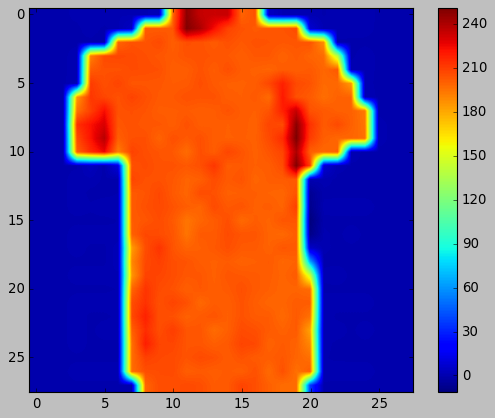

In [52]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

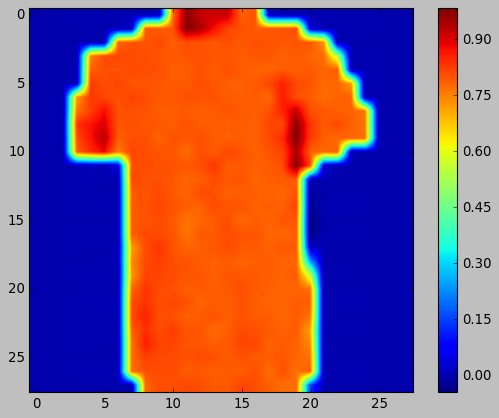

In [53]:
#Escalar imagen
res = res / 255

plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [54]:
#Creamos un arreglo para insertar la imagen
x = np.zeros((1, 28, 28))
x.shape

(1, 28, 28)

In [55]:
x[0] = np.array(res)

In [56]:
predictions = model.predict(x)
predictions

array([[9.8696637e-01, 4.2724228e-06, 2.5341165e-04, 6.6970388e-05,
        2.0033161e-07, 1.1825059e-16, 1.2708729e-02, 5.1342153e-18,
        1.0457204e-07, 4.3133172e-23]], dtype=float32)

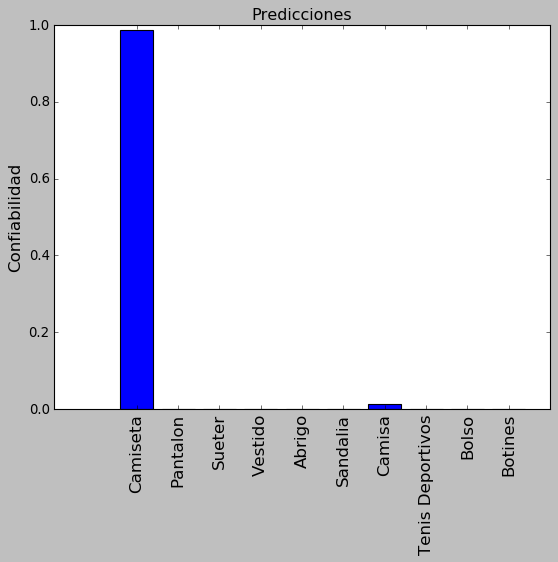

In [57]:
index = np.arange(len(classNames))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, classNames, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

## Creando un nuevo modelo y lo probamos antes de entrenarlo

In [59]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimize='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
loss, acc = model2.evaluate(testImages, testLabels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [61]:
acc

0.1177

In [62]:
model2.load_weights(checkPointPath)
loss, acc = model2.evaluate(testImages, testLabels)
acc

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.856